In [2]:
import re
import os 
import sys 

import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io

from pathlib import Path
from tqdm.notebook import trange, tqdm
import h5py
import pandas as pd
import scanpy as sc
import squidpy as sq
sc.settings.verbosity = 3

from matplotlib.pyplot import rc_context
from matplotlib import cm, colors
import matplotlib
sc.set_figure_params(format='png')
from PIL import Image
import seaborn as sns 
import anndata as ad


In [3]:
p_dir = (Path().cwd().parents[0]).absolute()
data_dir = p_dir / "data"

In [4]:
%load_ext autoreload
%autoreload 2

module_path = str(p_dir / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

import utils as my_utils

In [5]:
donor = f"combined_raw_09_15_new_mask"

all_donor = [
    "LN Donor A",
    "LN Donor E",
    "INT Donor B",
    "INT Donor E",
    "TS Donor A",
    "TS Donor E",
    "SP Donor A"
]


In [6]:
import spatial as sm

# Import data

In [7]:
adata_path = data_dir / "metadata" / f"{donor}.h5ad"

In [8]:
adata = sc.read_h5ad(adata_path)

In [9]:
markers_list = ['CD38', 'Vimentin', 'CD21', 'BCL6', 'ICOS1', 'CD11c',
       'FoxP3', 'CD4', 'CD138', 'CXCR5', 'CD20', 'CD8',  'PD1',
       'Ki67', 'COL1', 'CD3', 'CD27', 'EZH2', 'H3K27me3']

In [10]:
adata = adata[:, markers_list]

In [11]:
adata = sm.pp.rescale(adata, imageid='Dataset')

GMM for ['LN Donor A', 'LN Donor E', 'INT Donor B', 'INT Donor E', 'TS Donor A', 'TS Donor E', 'SP Donor A']
Categories (7, object): ['INT Donor B', 'INT Donor E', 'LN Donor A', 'LN Donor E', 'SP Donor A', 'TS Donor A', 'TS Donor E']
Finding the optimal gate by GMM for CD38
Finding the optimal gate by GMM for Vimentin
Finding the optimal gate by GMM for CD21
Finding the optimal gate by GMM for BCL6
Finding the optimal gate by GMM for ICOS1
Finding the optimal gate by GMM for CD11c
Finding the optimal gate by GMM for FoxP3
Finding the optimal gate by GMM for CD4
Finding the optimal gate by GMM for CD138
Finding the optimal gate by GMM for CXCR5
Finding the optimal gate by GMM for CD20
Finding the optimal gate by GMM for CD8
Finding the optimal gate by GMM for PD1
Finding the optimal gate by GMM for Ki67
Finding the optimal gate by GMM for COL1
Finding the optimal gate by GMM for CD3
Finding the optimal gate by GMM for CD27
Finding the optimal gate by GMM for EZH2
Finding the optimal gat

In [12]:
# Load the gating workflow
phenotype= pd.read_csv(data_dir / "metadata" / 'phenotype_workflow.csv')
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype")

Phenotyping Immune
Phenotyping Stroma 
Phenotyping Follicular dendritic cells
-- Subsetting Immune
Phenotyping T cells
Phenotyping B cells
-- Subsetting T cells
Phenotyping Cytotoxic T cells
Phenotyping Helpter T cells
-- Subsetting B cells
Phenotyping LZ B cells
Phenotyping DZ B cells
Phenotyping Plasma cells


Y:\coskun-lab\Thomas\Leap\src\spatial\tools\_phenotype_cells.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allpos_score['score'] = allpos_score.max(axis=1)


Phenotyping Memory B cells
-- Subsetting Cytotoxic T cells
Phenotyping Follicular CD8+ T cells
Phenotyping Exhausted T cells
-- Subsetting Helpter T cells
Phenotyping Follicular Helper T cells
Phenotyping Regulatory T-cells


Y:\coskun-lab\Thomas\Leap\src\spatial\tools\_phenotype_cells.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allpos_score['score'] = allpos_score.max(axis=1)


Consolidating the phenotypes across all groups


In [13]:
phenotype

,Unnamed: 0,Unnamed: 1,CD38,Vimentin,CD21,ICOS1,CD4,CD138,CXCR5,CD20,CD8,PD1,Ki67,COL1,CD3,CD27,EZH2,H3K27me3,FoxP3
0,all,Immune,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anypos,NaN,NaN,NaN,NaN,anypos,NaN,NaN,NaN,NaN
1,all,Stroma,NaN,anypos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anypos,NaN,NaN,NaN,NaN,NaN
2,all,Follicular dendritic cells,NaN,NaN,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immune,T cells,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pos,NaN,NaN,NaN,NaN
4,Immune,B cells,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,T cells,Cytotoxic T cells,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T cells,Helpter T cells,NaN,NaN,NaN,NaN,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,B cells,LZ B cells,NaN,NaN,NaN,NaN,NaN,NaN,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,B cells,DZ B cells,NaN,NaN,NaN,NaN,NaN,NaN,neg,NaN,NaN,NaN,pos,NaN,NaN,NaN,NaN,NaN,NaN
9,B cells,Plasma cells,allpos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,allpos,NaN,NaN,NaN


In [14]:
# Summary of the phenotyping
adata.obs['phenotype'].value_counts()

Stroma                        671990
Helpter T cells               230948
LZ B cells                    215943
Follicular dendritic cells    203123
DZ B cells                    169000
Cytotoxic T cells             115350
Plasma cells                  103923
Unknown                        64989
Regulatory T-cells             54104
Memory B cells                 43977
Follicular CD8+ T cells        38515
Follicular Helper T cells      29885
Exhausted T cells               8610
B cells                         3242
T cells                         1851
Name: phenotype, dtype: int64

In [31]:
donors = adata.obs.Dataset.unique()
dfs = []

for donor in donors:
    adata_subset = adata[adata.obs.Dataset == donor,:]
    
    # Summary of the phenotyping
    adata.obs['phenotype'].value_counts()
    
    df = pd.DataFrame(adata_subset.obs['phenotype'].value_counts())
    df.columns=[donor]
    dfs.append(df)
    
df = pd.concat(dfs, axis=1)

In [32]:
df.to_clipboard()

In [33]:
df

,LN Donor A,LN Donor E,INT Donor B,INT Donor E,TS Donor A,TS Donor E,SP Donor A
Stroma,62462.0,36348,109768,159014,60166,80576.0,163656.0
LZ B cells,31110.0,50122,8833,19755,70223,35900.0,NaN
Helpter T cells,29832.0,56238,7945,5409,32701,84759.0,14064.0
Cytotoxic T cells,21898.0,59197,5430,9305,7487,4507.0,7526.0
Follicular dendritic cells,12287.0,27103,10761,7395,37763,100710.0,7104.0
Regulatory T-cells,10021.0,2159,12924,11886,17114,NaN,NaN
Plasma cells,8318.0,11581,13888,10301,47384,12451.0,NaN
Follicular CD8+ T cells,7698.0,5921,5431,5968,12547,950.0,NaN
DZ B cells,4026.0,23621,605,995,17509,36421.0,85823.0
Memory B cells,3749.0,10648,650,548,11651,16731.0,NaN


In [15]:
adata.uns['phenotype_colors'] = sc.pl.palettes.vega_20[:len(np.unique(adata.obs['phenotype']))]
adata.obs['phenotype']  = adata.obs['phenotype'].astype('category')

    using data matrix X directly
Storing dendrogram info using `.uns['dendrogram_phenotype']`


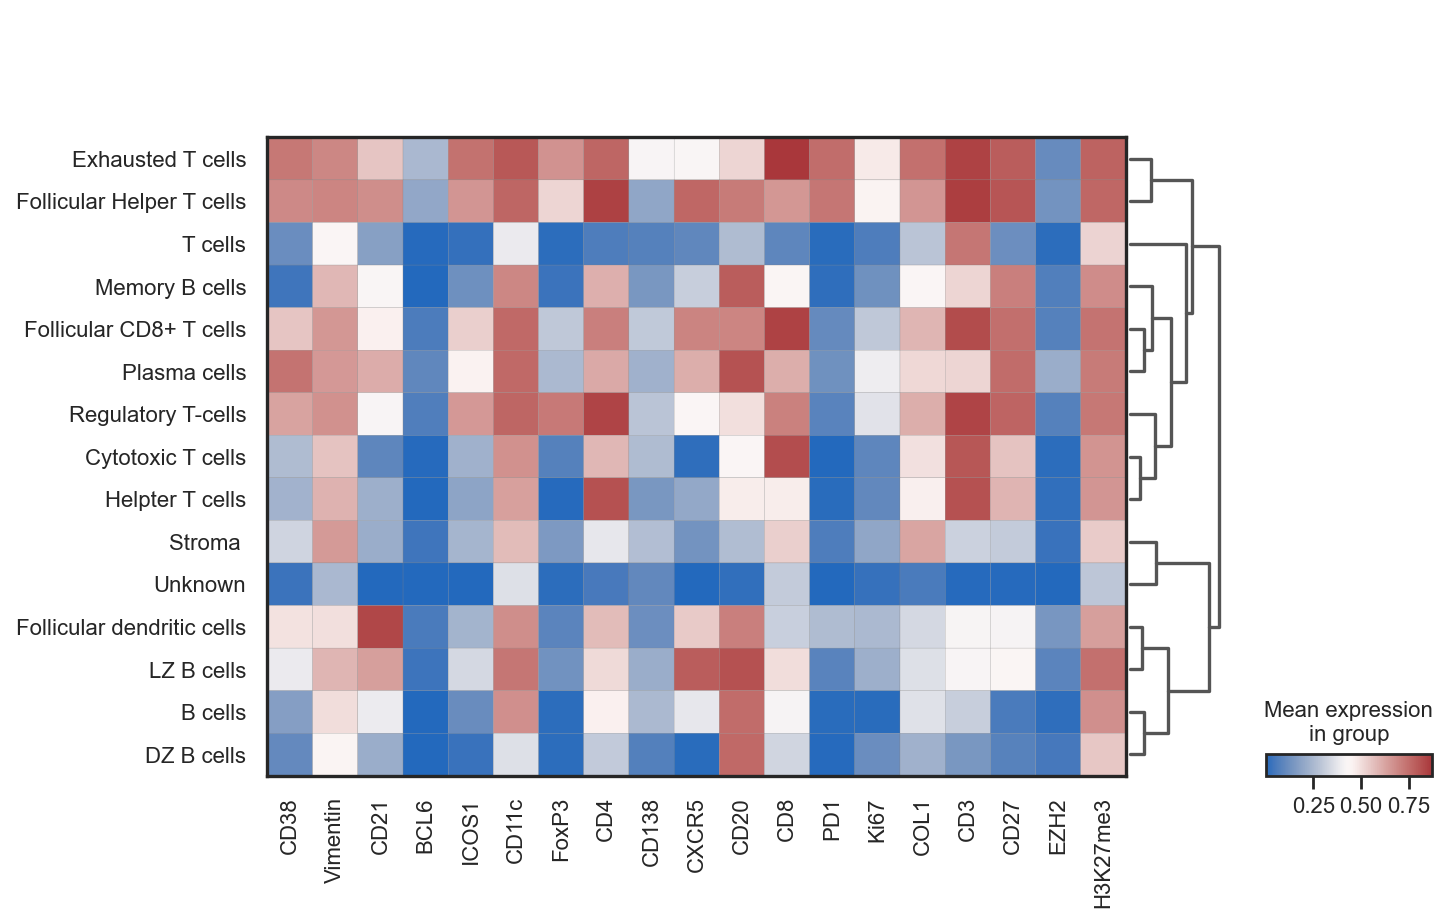

In [16]:
sc.tl.dendrogram(adata, groupby='phenotype')
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='phenotype', dendrogram=True, use_raw=False, cmap="vlag",)


In [17]:
import matplotlib 

var = 'phenotype'

cluster_label_order = adata.uns[f'dendrogram_{var}']['categories_ordered']

colors = adata.uns[f"{var}_colors"]
labels = adata.obs[var].cat.categories.tolist()

colors_rgb = []
for color in colors:
    colors_rgb.append(matplotlib.colors.hex2color(color))
colors_rgb = np.array(colors_rgb) * 255
colors_rgb = colors_rgb.astype(np.uint8)

colors_rgb_dict = {k:v for k,v in zip(labels, colors_rgb)}




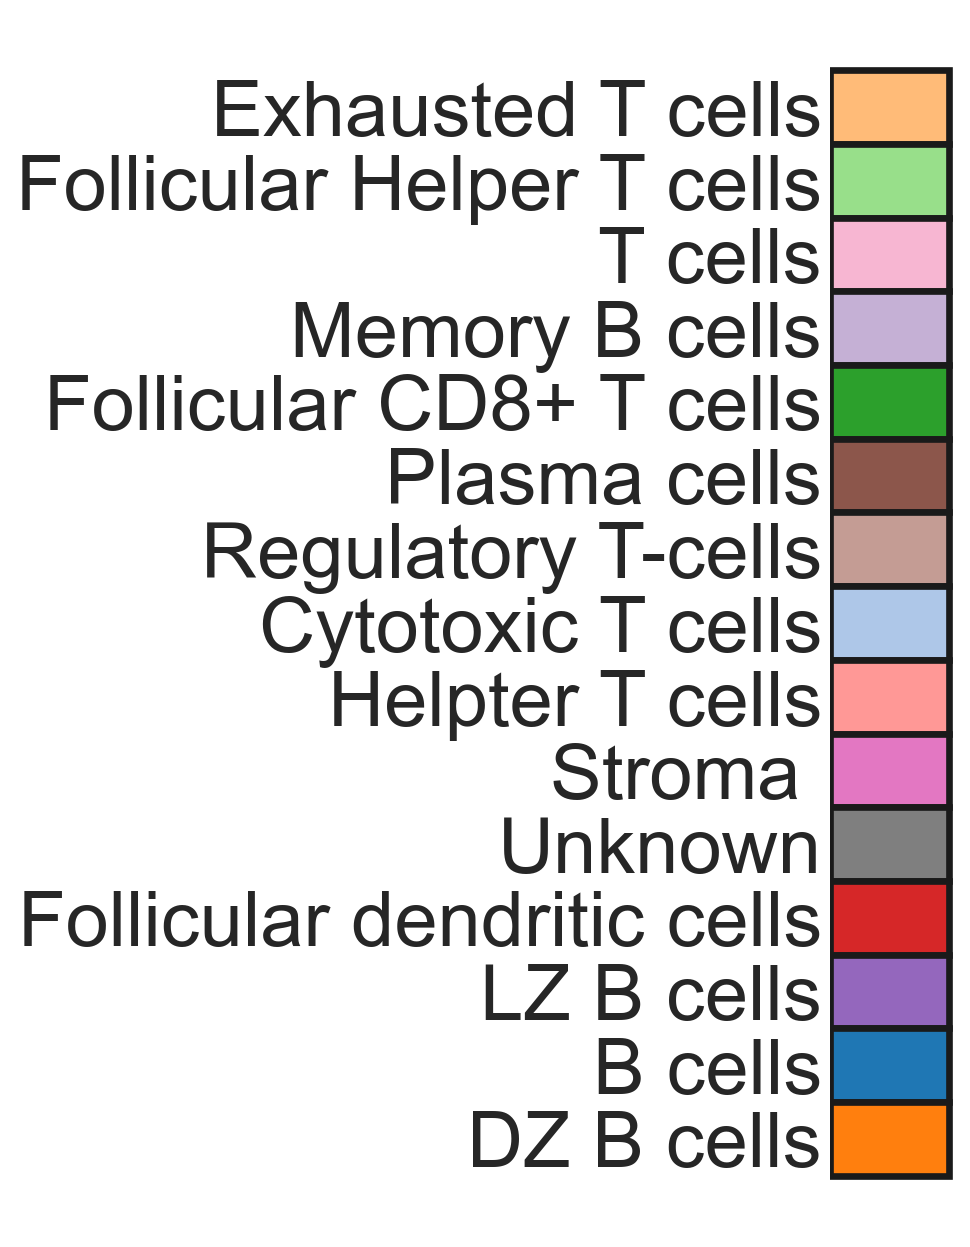

In [18]:
c=np.array([colors_rgb_dict[i] for i in cluster_label_order])

# legend
fig, ax = plt.subplots(figsize=(1,10))
ax.barh(y=range(len(colors_rgb_dict.values())), 
        color=c/255,
        width=1, 
        height=1,
        edgecolor='k',
        linewidth=3,
       )
_ = plt.yticks(range(len(colors_rgb_dict.values())), cluster_label_order, rotation=0, size=35)
_ = plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
# ax.yaxis.tick_right()
ax.invert_yaxis()
ax.grid(False)


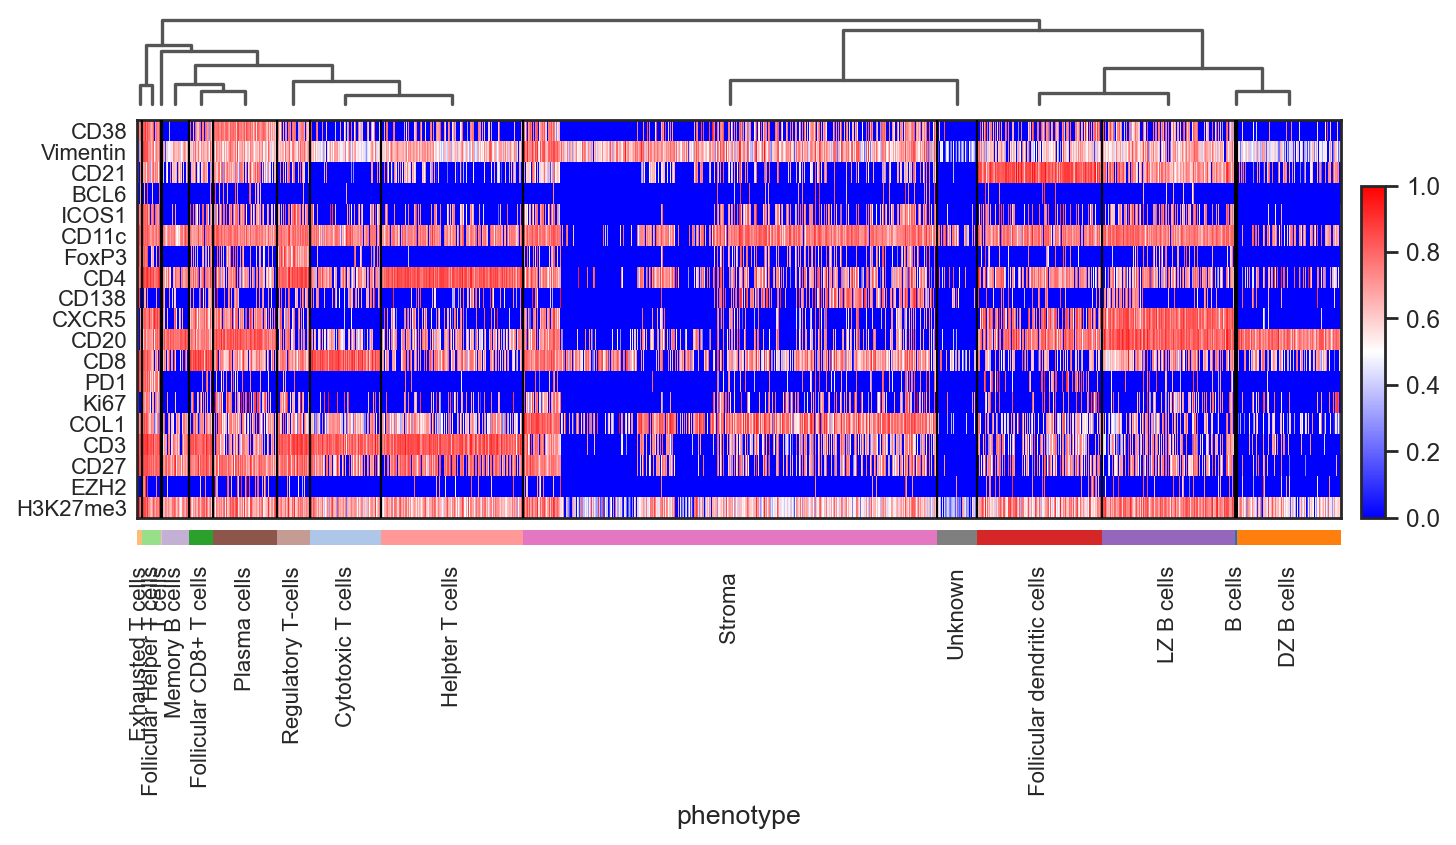

In [19]:
sc.pl.heatmap(adata, var_names= adata.var.index, groupby='phenotype', dendrogram=True, swap_axes=True, use_raw=False, cmap="bwr")

# Generate cell mask images

In [69]:
import matplotlib 
from PIL import Image

def create_clustered_cell(mask, label2cell, my_cmap, **kwargs):
    img = np.zeros((mask.shape[0], mask.shape[1],3), dtype=np.uint8)

    # for i, cells in tqdm(label2cell.items(), total=len(label2cell), leave=False):
    for i, cells in label2cell.items():
        rows, cols = np.where(np.isin(mask, cells))
        img[rows, cols, :] = my_cmap[int(i)]
    return img


def get_img_size(roi_dict, size=1000):
    row_max = 0
    col_max = 0
    for k, v in roi_dict.items():
        row_max = max(row_max, v[0])
        col_max = max(col_max, v[1])
    return row_max + size, col_max + size

# Read mask image
def get_masks(mask_folder):
    """
    Function to get all mask from mask forlder
    """
    # Read masks
    masks = {}

    for (dirpath, dirnames, filenames) in os.walk(mask_folder):
        for name in sorted(filenames):
            if "tif" in name:
                filename = os.path.join(dirpath, name)
                img = skimage.io.imread(filename)
                condition =  name.split(".")[0]
                masks[condition] = img
            else:
                continue
    return masks


def get_masks_cp(mask_folder):
    """
    Function to get all mask from mask forlder
    """
    # Read masks
    masks = {}

    for (dirpath, dirnames, filenames) in os.walk(mask_folder):
        for name in sorted(filenames):
            if "tif" in name:
                filename = os.path.join(dirpath, name)
                img = skimage.io.imread(filename)
                condition = name.split("_")[2].split("Donor")[0]
                masks[condition] = img[:1000, :1000]
            else:
                continue
    return masks


In [70]:
if "combined" in donor:
    masks = {}
    for d in all_donor:
        masks[d] = get_masks(data_dir / "masks" / d)
else:
    masks = get_masks(data_dir / "masks" / donor)

In [71]:
# Format row, col
arrangement = {
    "LN Donor A": {
        1: [0, 1000],
        2: [0, 2000],
        3: [1000, 0],
        4: [1000, 1000],
        5: [1000, 2000],
        6: [1000, 3000],
        7: [2000, 0],
        8: [2000, 1000],
        9: [2000, 2000],
        10: [2000, 3000],
        11: [3000, 0],
        12: [3000, 1000],
        13: [3000, 2000],
        14: [3000, 3000],
        15: [4000, 1000],
        16: [4000, 2000],
    },
    "LN Donor E": {
        1: [1000, 0],
        2: [1000, 1000],
        3: [1000, 2000],
        4: [1000, 3000],
        5: [1000, 4000],
        6: [1000, 5000],
        7: [1000, 6000],
        8: [1000, 7000],
        9: [1000, 8000],
        10: [0, 0],
        11: [0, 1000],
        12: [0, 2000],
        13: [0, 3000],
        14: [0, 4000],
    },
    "INT Donor B": {
        1: [0, 0],
        2: [0, 1000],
        3: [1000, 0],
        4: [1000, 1000],
        5: [2000, 0],
        6: [2000, 1000],
        7: [2000, 2000],
        8: [2000, 3000],
        9: [3000, 0],
        10: [3000, 1000],
        11: [3000, 2000],
        12: [3000, 3000],
        13: [4000, 0],
        14: [4000, 1000],
        15: [4000, 2000],
        16: [4000, 3000],
        # 17: [5000, 0],
        # 18: [5000, 1000],
        # 19: [5000, 2000],
        # 20: [5000, 3000],
    },
    "INT Donor E": {
        1: [0, 0],
        2: [0, 1000],
        3: [0, 2000],
        4: [0, 3000],
        # 5: [0, 4000],
        6: [1000, 0],
        7: [1000, 1000],
        8: [1000, 2000],
        9: [1000, 3000],
        10: [1000, 4000],
        11: [2000, 3000],
        12: [2000, 4000],
        13: [3000, 3000],
        14: [3000, 4000],
        15: [4000, 3000],
        16: [4000, 4000],
    },
    "TS Donor A": {
        1: [0, 0],
        2: [0, 1000],
        3: [0, 2000],
        4: [0, 3000],
        5: [0, 4000],
        6: [0, 5000],
        7: [0, 6000],
        8: [1000, 0],
        9: [1000, 1000],
        10: [1000, 2000],
        11: [1000, 3000],
        12: [1000, 4000],
        13: [1000, 5000],
        14: [1000, 6000],
    },
    "TS Donor E": {
        1: [0, 0],
        2: [0, 1000],
        3: [0, 2000],
        4: [1000, 0],
        5: [1000, 1000],
        6: [1000, 2000],
        7: [2000, 0],
        8: [2000, 1000],
        9: [2000, 2000],
        10: [3000, 0],
        11: [3000, 1000],
        12: [3000, 2000],
        13: [4000, 0],
        14: [4000, 1000],
        15: [4000, 2000],
        16: [5000, 0],
        17: [5000, 1000],
        18: [5000, 2000],
    },
    "SP Donor A": {
        1: [0, 0],
        2: [0, 1000],
        3: [0, 2000],
        4: [0, 3000],
        5: [0, 4000],
        6: [1000, 0],
        7: [1000, 1000],
        8: [1000, 2000],
        9: [1000, 3000],
        10: [1000, 4000],
        11: [2000, 0],
        12: [2000, 1000],
        13: [2000, 2000],
        14: [2000, 3000],
        15: [2000, 4000],
        16: [3000, 0],
        17: [3000, 1000],
        18: [3000, 2000],
        19: [3000, 3000],
        20: [3000, 4000],
    },
}

In [72]:
colors = adata.uns["phenotype_colors"]
labels = adata.obs.phenotype.cat.categories.tolist()

colors_rgb = []
for color in colors:
    colors_rgb.append(matplotlib.colors.hex2color(color))
colors_rgb = np.array(colors_rgb) * 255
colors_rgb = colors_rgb.astype(np.uint8)

In [73]:
size = 1000

for d in adata.obs.Dataset.unique():
    adata_donor = adata[adata.obs.Dataset == d, :]

    # Create combined images
    y_max, x_max = get_img_size(arrangement[d])
    img_combined = np.zeros((y_max, x_max, 3), dtype=np.uint8)

    for i in adata_donor.obs.ROI.unique():
        if i not in arrangement[d].keys():
            continue

        # Get dataset
        adata_subset = adata_donor[adata_donor.obs.ROI == i, :]

        # Get mask
        mask = masks[d][str(int(i))]

        # Get label2cell dict
        label2cell = {}
        for j, l in enumerate(labels):
            cell_id = adata_subset[adata_subset.obs.phenotype == l].obs.Cell.to_list()
            label2cell[j] = cell_id

        img = create_clustered_cell(mask, label2cell, colors_rgb)

        # Insert to combine image
        y = max(0, arrangement[d][i][0] - 1)
        x = max(0, arrangement[d][i][1] - 1)
        img_combined[y : y + size, x : x + size] = img

    save_path = p_dir / "figures" / "CN" / f"Phenotype_{d}.png"
    img_combined = Image.fromarray(img_combined)
    img_combined.save(save_path)
